We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('heartDisease.csv')

In [3]:
data.head()      #first five rows of our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

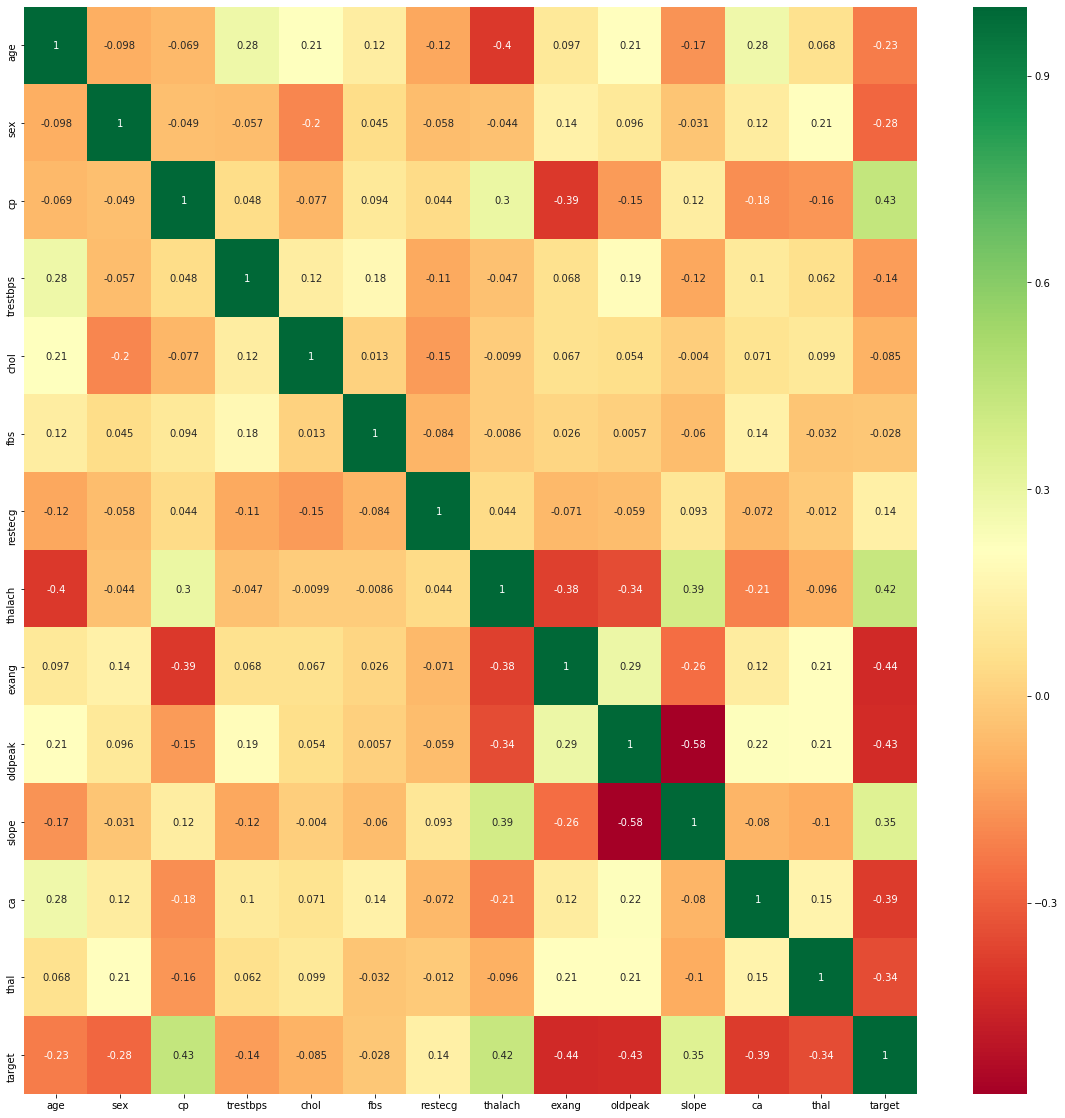

In [6]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002539B405550>,
      dtype=object)

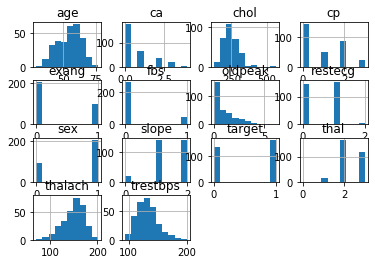

In [7]:
data.hist()

In [8]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

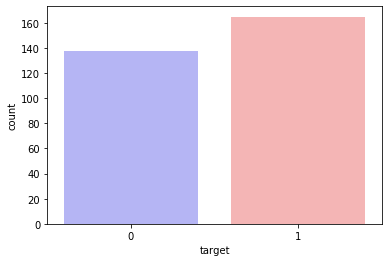

In [9]:
sns.countplot(x="target",data=data,palette="bwr")
plt.show()

In [10]:
count_No_Disease=len(data[data.target==0])
count_Have_Disease=len(data[data.target==1])
print("Percentage of Patients not Having Heart Disease: {:.2f}%".format((count_No_Disease/(len(data.target))*100)))
print("Percentage of Patients  Have Heart Disease: {:.2f}%".format((count_Have_Disease/(len(data.target))*100)))

Percentage of Patients not Having Heart Disease: 45.54%
Percentage of Patients  Have Heart Disease: 54.46%


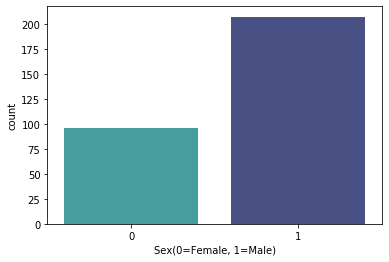

In [11]:
sns.countplot(x='sex',data=data,palette="mako_r")
plt.xlabel("Sex(0=Female, 1=Male)")
plt.show()

In [12]:
count_Female = len(data[data.sex == 0])
count_Male = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((count_Female / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_Male / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


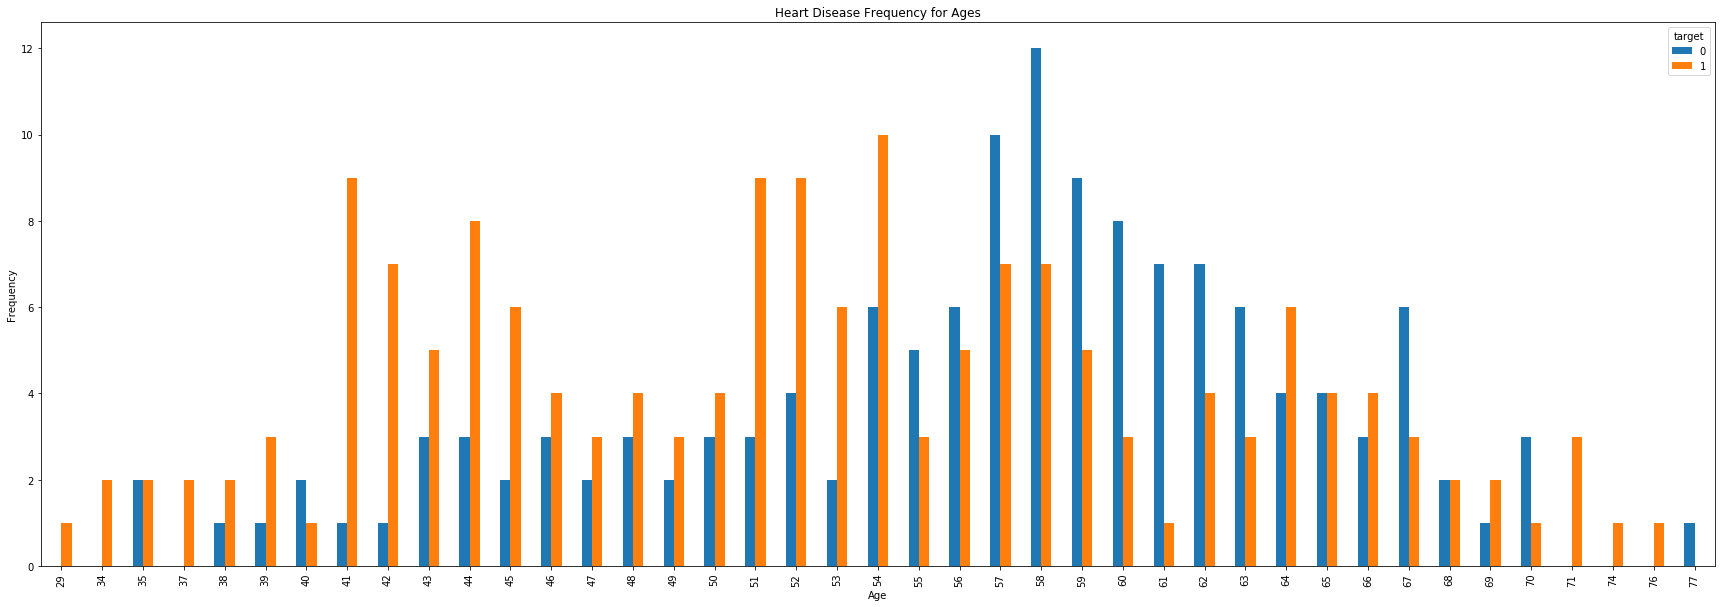

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(30,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAges.png')
plt.show()

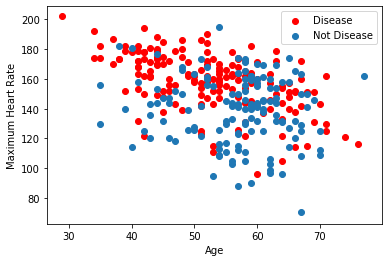

In [14]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

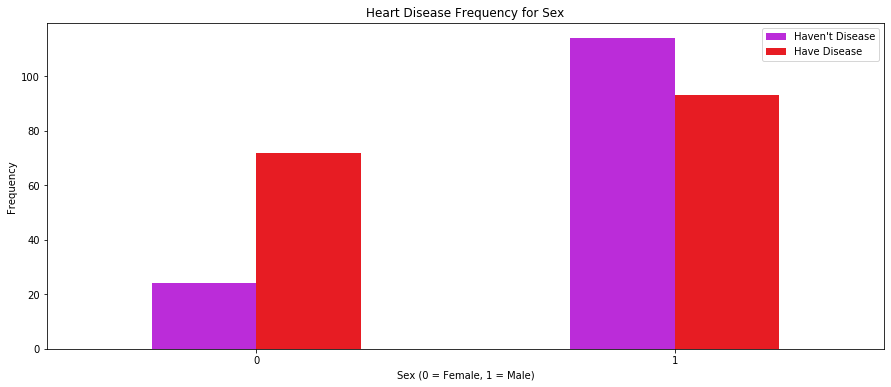

In [15]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#BB2CD9','#E71C23' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [16]:
dataset=pd.get_dummies(data,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
dataset.shape

(303, 31)

In [20]:
x=dataset.drop(['target'],axis=1)
y=dataset['target']

In [21]:
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [22]:
# splitting the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\amit gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = log_reg.predict(X_test)

In [25]:
acc=log_reg.score(X_test,y_test)*100
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.53%


In [26]:
from sklearn.metrics import roc_auc_score
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8474277660324171

# Random Forest Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [36]:
x_pred=kn.predict(X_test)

In [37]:
acc = kn.score(X_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 82.89%


In [38]:
from sklearn.metrics import roc_auc_score
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8474277660324171

So from the above two algorithms the Logistic Regression gives Best Accuracy but the ROC score of both the algorithms is same